<a href="https://colab.research.google.com/github/GARCIAAA123/Introduction-to-Machine-Learning/blob/main/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Introduction to Machine Learning**

# **Chapter 2.1 Multiple linear regression (MLR)**
---

## Import libraries

In [ ]:
import numpy as np                  # for scientific computing (e.g. culclations with array)
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for visualization
import seaborn as sns               # for visualization

## Dataset loading

This dataset is from Kaggle.
For more information about this dataset, see
https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [ ]:
#Download dataset from Github
!wget https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/housing.csv

df_housing = pd.read_csv("housing.csv")     # making data frame object from csv file
df_housing

--2023-08-08 10:18:04--  https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-08-08 10:18:04 (104 MB/s) - ‘housing.csv’ saved [1423529/1423529]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

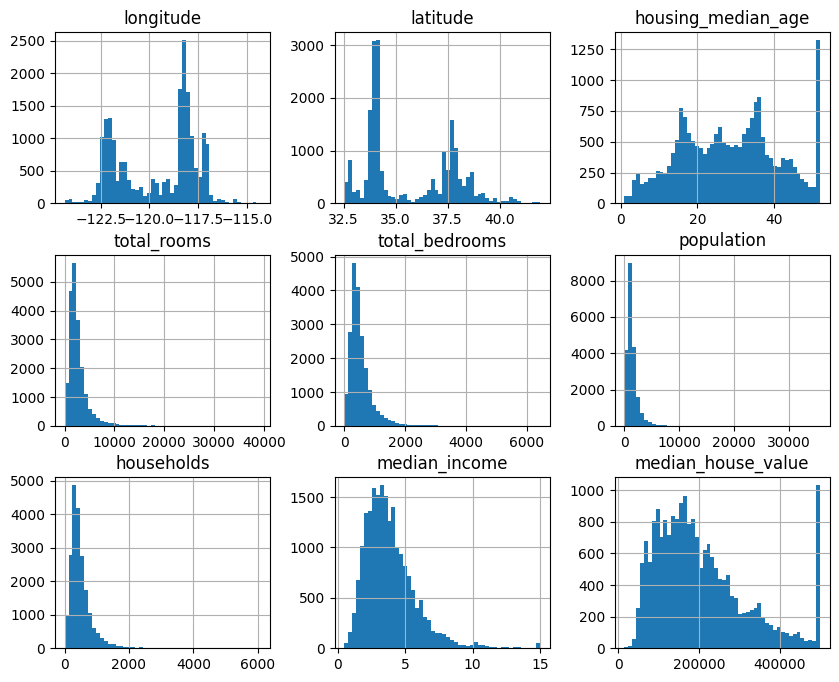

In [ ]:
df_housing.hist(bins=50, figsize=[10,8])

In [ ]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##🤔 **Exercise 2.1**

Create a linear regression model that predicts **median_house_value** using only **median_income** column as input. Train it and check its coefficient of determination $R^2$ and MSE.


W = [[79398.93889649]]
b = [206855.81690891]
R^2(train) = 0.47422397192044696
R^2(test) = 0.47031359145958485
RMSE(train) = 83735.12283188783
RMSE(test) = 83727.38101697831


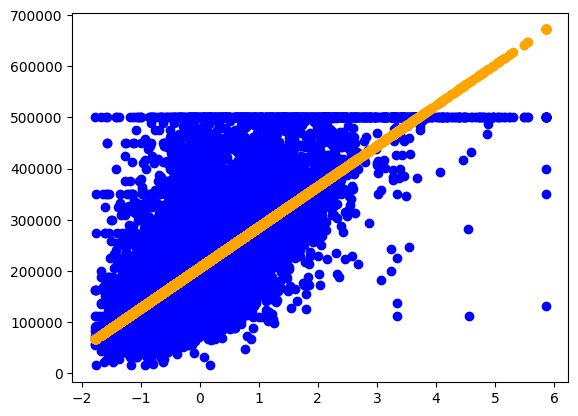

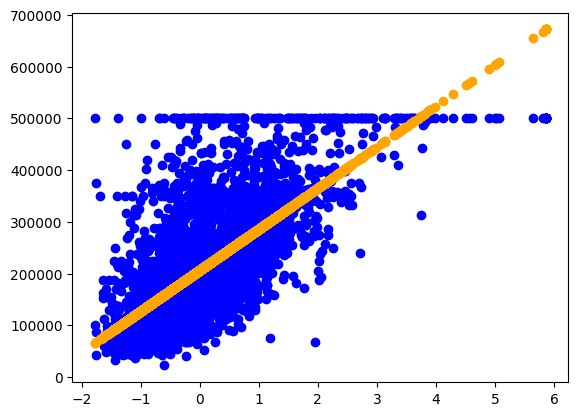

In [ ]:
# make your code here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(df_housing[["median_income"]])
std_X = scaler.transform(df_housing[["median_income"]])
t = df_housing[["median_house_value"]]

X_train, X_test, t_train, t_test = train_test_split(std_X, t, test_size=0.2)
model = LinearRegression(fit_intercept= True)  # model definition (using y=ax+b)
model.fit(std_X, t)

y_train = model.predict(X_train)
y_test = model.predict(X_test)
R2_train = model.score(X_train, t_train)
R2_test = model.score(X_test, t_test)
rmse_train = np.sqrt( np.average((t_train - y_train)**2) )
rmse_test = np.sqrt( np.average((t_test - y_test)**2) )


print("W =", model.coef_)
print("b =", model.intercept_)
print("R^2(train) =", R2_train)
print("R^2(test) =", R2_test)
print("RMSE(train) =", rmse_train)
print("RMSE(test) =", rmse_test)

# show a graph
plt.scatter(X_train, t_train, c="blue")
plt.scatter(X_train, y_train, c="orange")
plt.show()

# show a graph
plt.scatter(X_test, t_test, c="blue")
plt.scatter(X_test, y_test, c="orange")
plt.show()


##🤔 **Exercise 2.2**

Add freely selected features to the input $X$ of the regression model created in Exercise 2.1. Train it and check its $R^2$ and MSE.


In [ ]:
# make your code here
# make your code here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit(df_housing[["median_income", "population"]])
std_X = scaler.transform(df_housing[["median_income" , "population"]])
t = df_housing[["median_house_value"]]

X_train, X_test, t_train, t_test = train_test_split(std_X, t, test_size=0.2)
model = LinearRegression(fit_intercept= True)  # model definition (using y=ax+b)
model.fit(std_X, t)

y_train = model.predict(X_train)
y_test = model.predict(X_test)
R2_train = model.score(X_train, t_train)
R2_test = model.score(X_test, t_test)
rmse_train = np.sqrt( np.average((t_train - y_train)**2) )
rmse_test = np.sqrt( np.average((t_test - y_test)**2) )


print("W =", model.coef_)
print("b =", model.intercept_)
print("R^2(train) =", R2_train)
print("R^2(test) =", R2_test)
print("RMSE(train) =", rmse_train)
print("RMSE(test) =", rmse_test)


W = [[79414.54567893 -3228.31333072]]
b = [206855.81690891]
R^2(train) = 0.47322773232425097
R^2(test) = 0.4780075760615018
RMSE(train) = 83830.44184073832
RMSE(test) = 83031.7817516025
